In [91]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset, InsetPosition
plt.rcParams['text.usetex'] = True
plt.rcParams["text.latex.preamble"].join([
        r"\usepackage{amsmath}",              
        r"\setmainfont{amssymb}",
])

'\\usepackage{amsmath}\\setmainfont{amssymb}'

- set the function
$$
\begin{equation}
\begin{aligned}
\dot{\Omega} &=-\frac{2 \Omega V}{d}-\frac{3}{40 d^{4}} \Omega-\frac{1}{5 d} \Omega^{3}-\frac{1}{5 d^{3}} V^{2} \Omega \\
\dot{V} &=d \Omega^{2}-\frac{1}{8 d^{2}}-\frac{3}{40 d^{4}} V-\frac{1}{5 d} \Omega^{2} V-\frac{1}{5 d^{3}} V^{3} \\
\dot{d} &=V\\
\dot{\theta} &= \Omega
\end{aligned}
\end{equation}
$$

In [4]:
def orbits(y,t):
    # y[0] -> d, y[1] -> V, y[2]-> \Omega, y[3]-> \theta
    return np.array([y[1], \
                     y[0]*np.square(y[2]) - 0.125/np.square(y[0]) - 0.075*y[1]/np.power(y[0],4) - 0.2*np.square(y[2])*y[1]/y[0] - 0.2*np.power(y[1],3)/np.power(y[0],3), \
                     -2.0*y[2]*y[1]/y[0] - 0.075*y[2]/np.power(y[0],4) - 0.2*np.power(y[2],3)/y[0] - 0.2*np.square(y[1])*y[2]/np.power(y[0],3), \
                    y[2]])

- 4th Runge-Kutta

In [ ]:
def rungekutta4(f, y0, t):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    for i in range(n - 1):
        h = t[i+1] - t[i]
        k1 = f(y[i], t[i])
        k2 = f(y[i] + k1 * h / 2., t[i] + h / 2.)
        k3 = f(y[i] + k2 * h / 2., t[i] + h / 2.)
        k4 = f(y[i] + k3 * h, t[i] + h)
        y[i+1] = y[i] + (h / 6.) * (k1 + 2*k2 + 2*k3 + k4)
    return y

- set the initial condition

In [6]:
initial = np.array([5.0, 0.0, 0.1*np.sqrt(0.1),0])

- Begin to solve

In [28]:
t = np.linspace(0, 750, 10000)
sol = rungekutta4(orbits, initial, t)

- Time to give the radius 2.5

In [45]:
np.argmin(np.abs(sol[:,0]-2.5))*(750/10000)

740.55

<IPython.core.display.Javascript object>


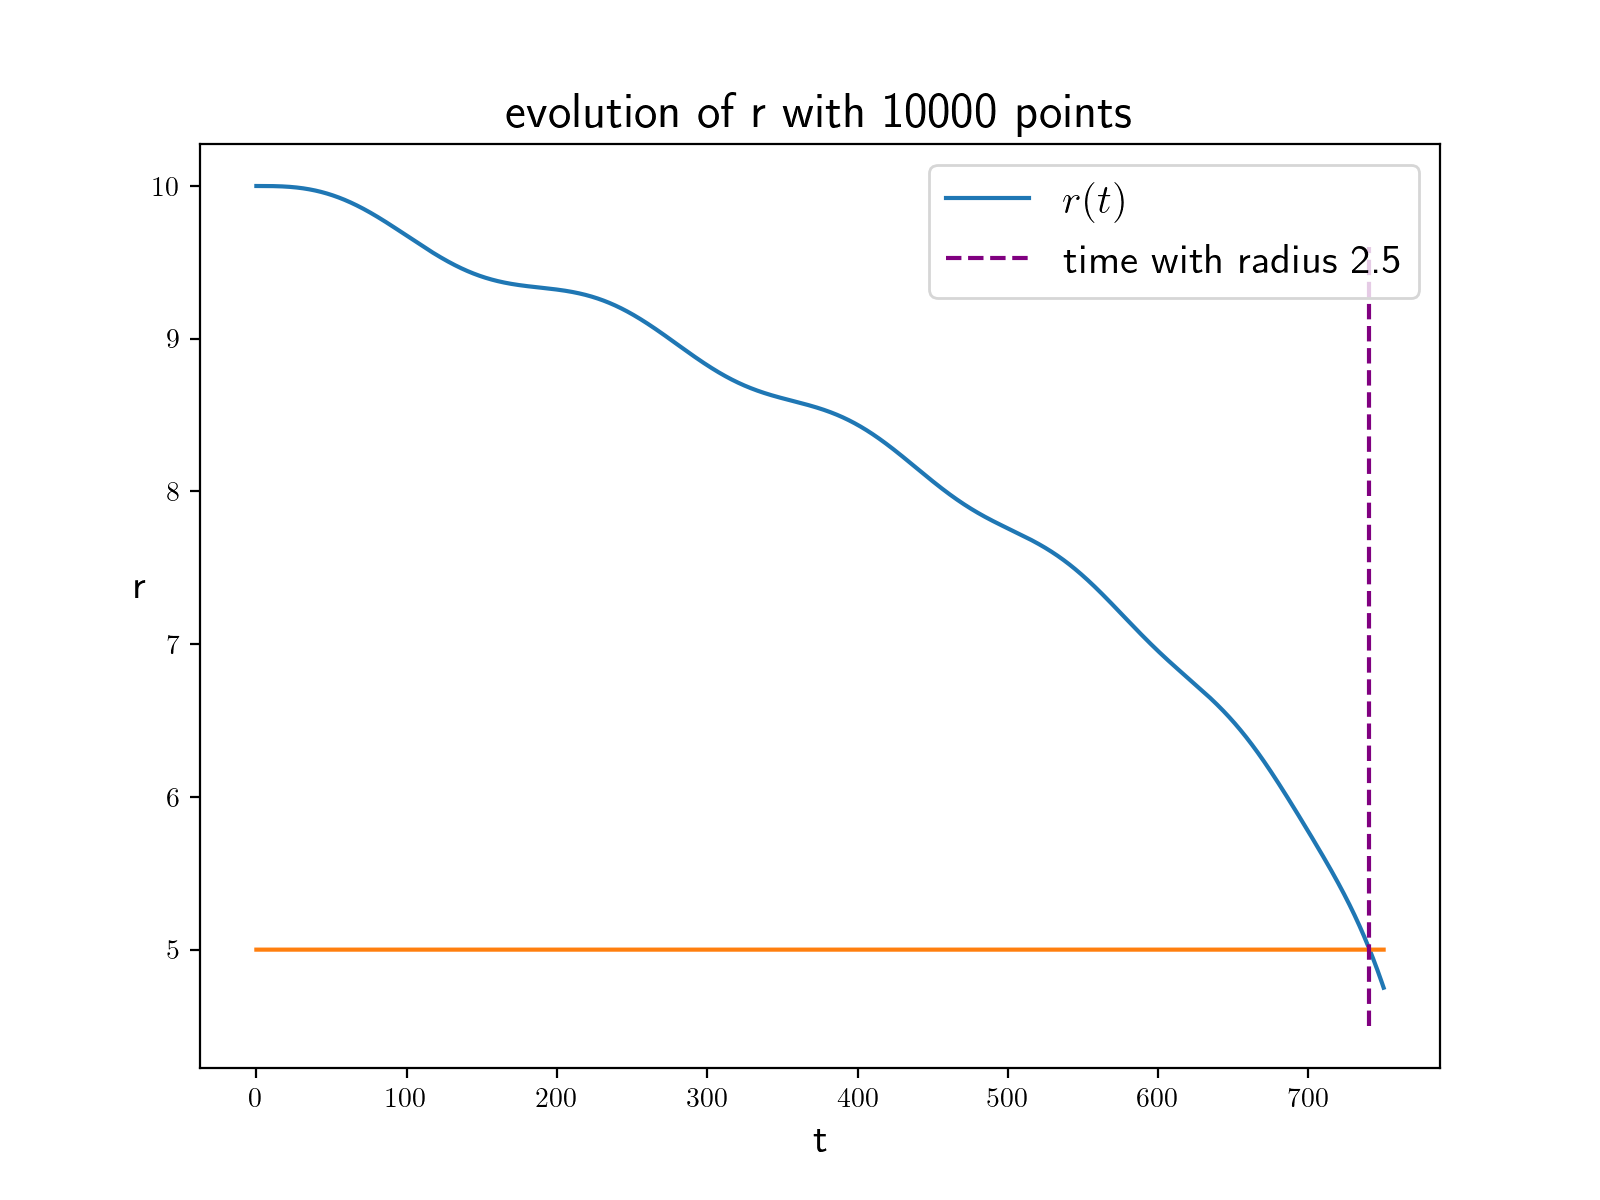

In [135]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(t[:], 2.0*sol[:, 0], label=r'$r(t)$')
ax.plot(t,5.0*np.ones(sol[:,0].size))
ax.vlines(x=740.55,ymin=4.5, ymax=9.6,ls="--",color="purple",label='time with radius 2.5')
ax.set_xlabel('t',fontsize=15)
ax.set_ylabel('r',fontsize=15,rotation=0)
ax.grid()
ax.legend(fontsize=15,loc=1)
ax.set_title("evolution of r with 10000 points",fontsize=18)
plt.show()
plt.savefig("/Users/hawk/Downloads/distance.jpg",dpi=400)

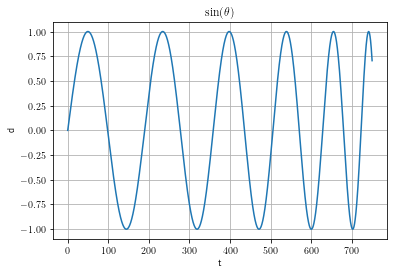

In [27]:
plt.plot(t, np.sin(sol[:, 3]))
plt.xlabel('t')
plt.ylabel('d')
plt.grid()
plt.title(r"$\sin(\theta)$")
plt.show()

<IPython.core.display.Javascript object>


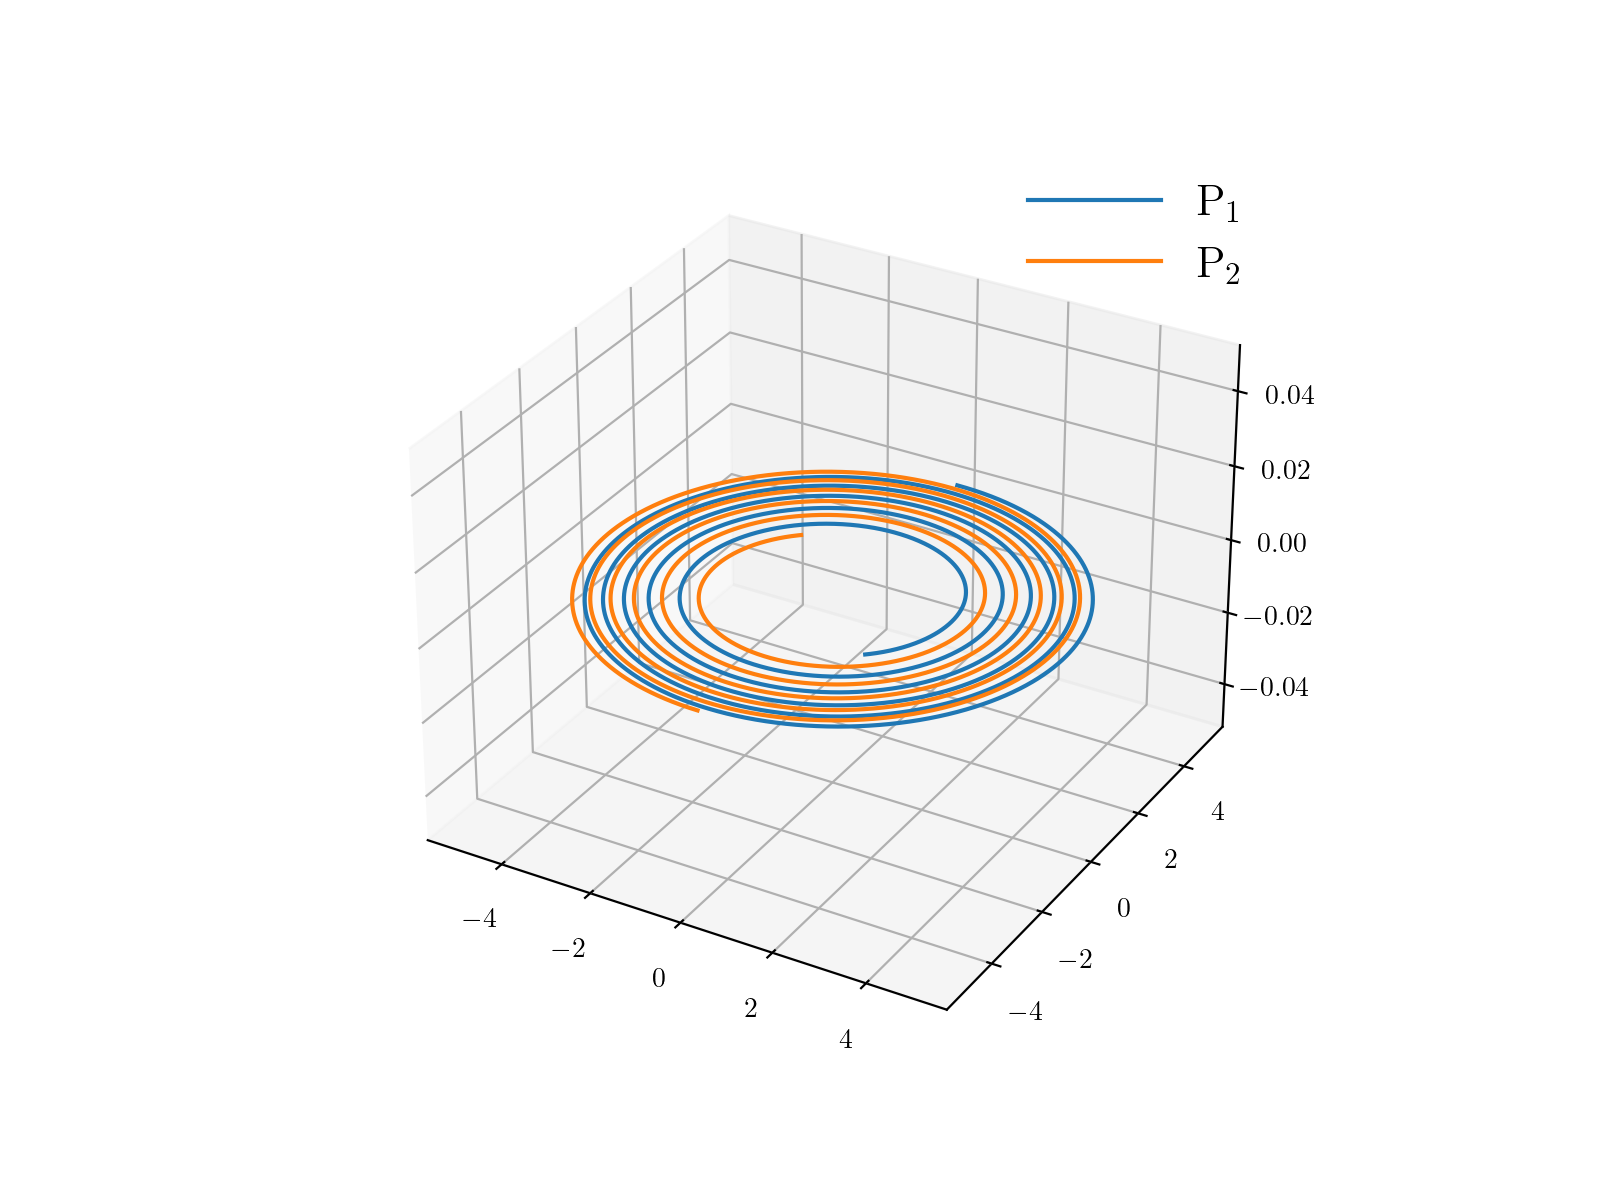

In [120]:
orbit = plt.figure(figsize=(8, 6)).add_subplot(projection='3d')
z = 0
# first bh
x1 = sol[:, 0] * np.sin(sol[:, 3])
y1 = sol[:, 0] * np.cos(sol[:, 3])

# another symmetric bh
x2 = sol[:, 0] * np.sin(sol[:, 3]+np.pi)
y2 = sol[:, 0] * np.cos(sol[:, 3]+np.pi)

orbit.plot(x1, y1, z, label=r'$\mathrm{P}_1$')
orbit.plot(x2, y2, z, label=r'$\mathrm{P}_2$')

orbit.legend(frameon=False,fontsize=16,handlelength=3,labelspacing=0.5)

plt.show()

- Convergence Test

In [130]:
t0 = np.linspace(0, 750, 1000)
t1 = np.linspace(0, 750, 2500)
t2 = np.linspace(0, 750, 20000)
t3 = np.linspace(0, 750, 50000)
t4 = np.linspace(0, 750, 100000)

sol0 = rungekutta4(orbits, initial, t0)
sol1 = rungekutta4(orbits, initial, t1)
sol2 = rungekutta4(orbits, initial, t2)
sol3 = rungekutta4(orbits, initial, t3)
sol4 = rungekutta4(orbits, initial, t4)

<IPython.core.display.Javascript object>


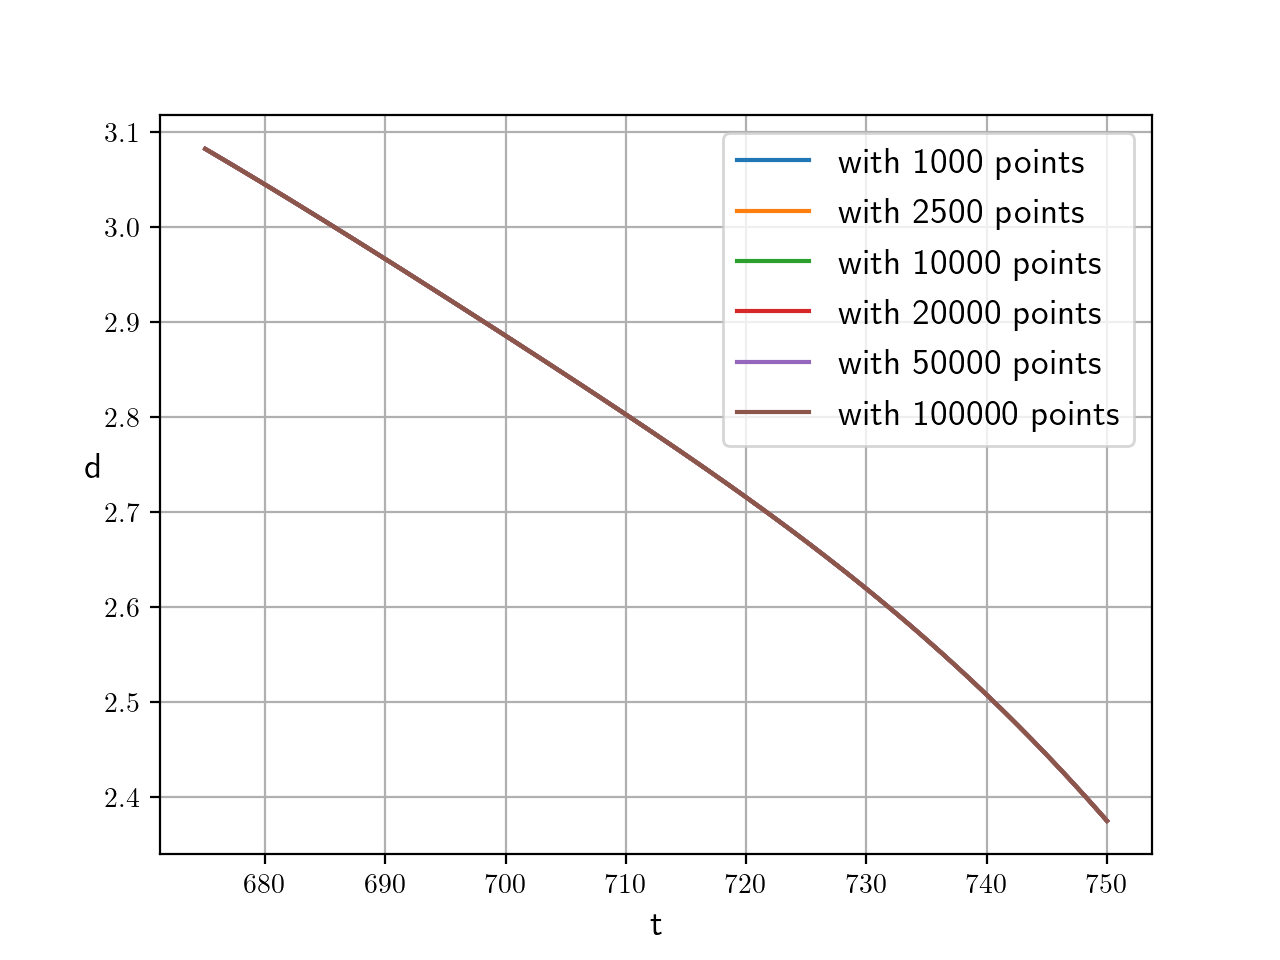

In [131]:
fig_res, ax_res = plt.subplots()

ax_res.plot(t0[900:], sol0[900:, 0], label='with 1000 points')
ax_res.plot(t1[2250:], sol1[2250:, 0], label='with 2500 points')
ax_res.plot(t[9000:], sol[9000:, 0], label='with 10000 points')
ax_res.plot(t2[18000:], sol2[18000:, 0], label='with 20000 points')
ax_res.plot(t3[45000:], sol3[45000:, 0], label='with 50000 points')
ax_res.plot(t5[90000:], sol5[90000:, 0], label='with 100000 points')

ax_res.set_xlabel('t',fontsize=13)
ax_res.set_ylabel('d',fontsize=13,rotation=0)
ax_res.grid()
ax_res.legend(fontsize=13)
plt.show()

In [132]:
np.argmin(np.abs(sol0[:,0]-2.5))*(750/1000),np.argmin(np.abs(sol1[:,0]-2.5))*(750/2500),\
np.argmin(np.abs(sol[:,0]-2.5))*(750/10000),np.argmin(np.abs(sol2[:,0]-2.5))*(750/20000),\
np.argmin(np.abs(sol3[:,0]-2.5))*(750/50000),np.argmin(np.abs(sol5[:,0]-2.5))*(750/100000)

(740.25, 740.4, 740.55, 740.625, 740.64, 740.6474999999999)

<IPython.core.display.Javascript object>


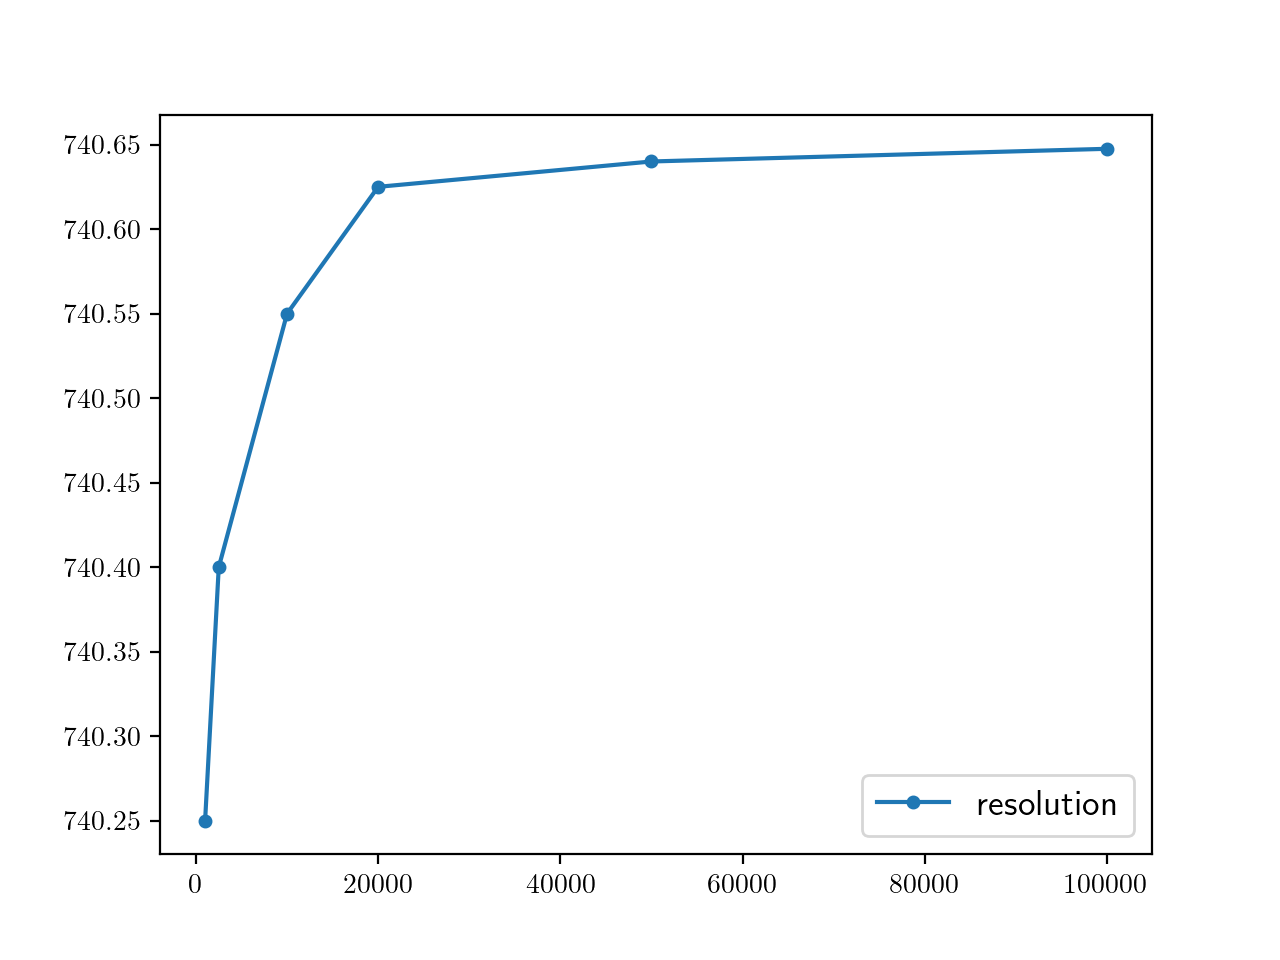

In [133]:
fig_con, ax_con = plt.subplots()

ax_con.plot(np.array([1000,2500,10000,20000,50000,100000]),np.array([740.25, 740.4, 740.55, 740.625, 740.64,740.6475]),\
            marker='o',markersize=4,label="resolution")
ax_con.legend(fontsize=13)
plt.show()
plt.savefig("/Users/hawk/Downloads/convergence.jpg",dpi=400)

<IPython.core.display.Javascript object>


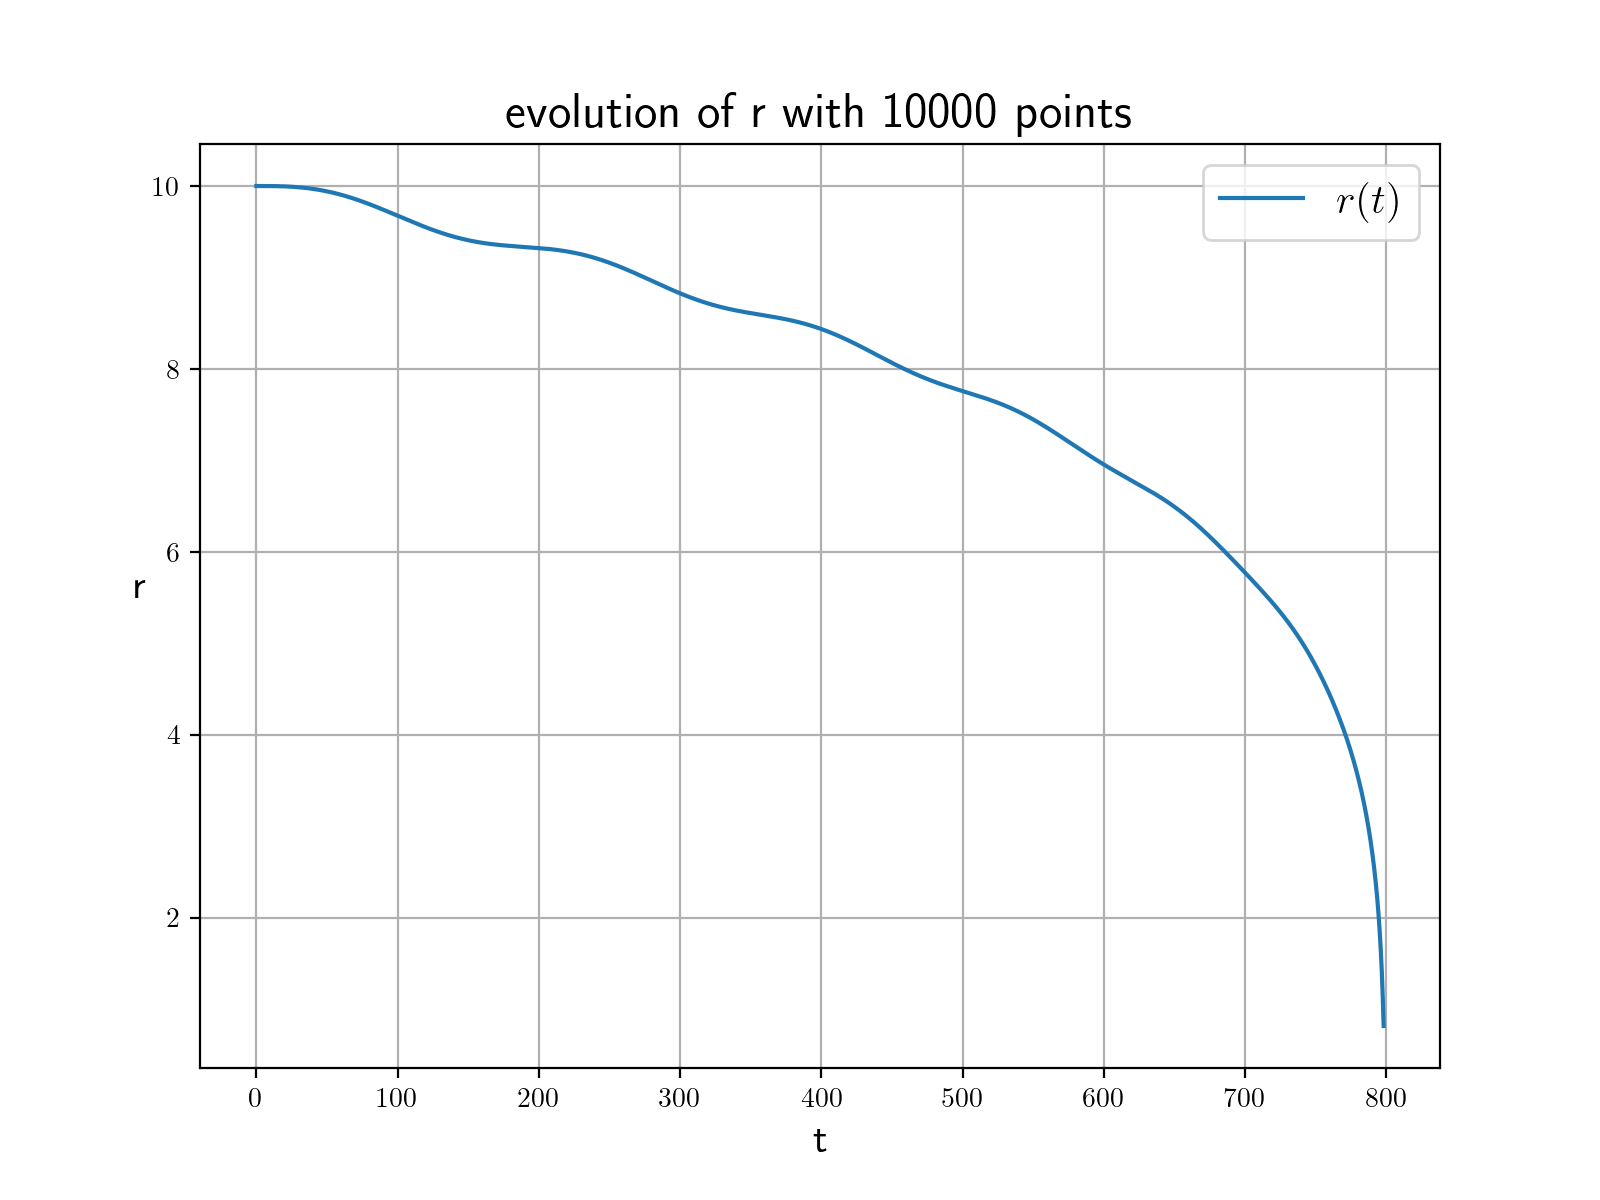

In [150]:
longtime = np.linspace(0, 798, 10000)
longsol = rungekutta4(orbits, initial, longtime)
figlong, axlong = plt.subplots(figsize=(8, 6))

axlong.plot(longtime[:], 2.0*longsol[:, 0], label=r'$r(t)$')
axlong.set_xlabel('t',fontsize=15)
axlong.set_ylabel('r',fontsize=15,rotation=0)
axlong.grid()
axlong.legend(fontsize=15,loc=1)
axlong.set_title("evolution of r with 10000 points",fontsize=18)
plt.show()
plt.savefig("/Users/hawk/Downloads/longtime.jpg",dpi=400)